In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Wczytanie 
df = pd.read_csv("kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.drop(columns=['id'], inplace=True) #Usuwam kolumne id ponieważ nie wnosi ona żadnych istotnych informacji
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [4]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
#Szybki podgląd na typy kolumn, jak widać niektóre z nich są zapisane w postaci object
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
#Wypisanie unikalnych wartości dla kolumn zapisanych w typie object 
def showUnique(x):
    for c in x.columns:
        if x[c].dtype == "object":
            print("Kolumna " + str(c) + ":\t" + str(df[c].unique()))
showUnique(df)

Kolumna rbc:	[nan 'normal' 'abnormal']
Kolumna pc:	['normal' 'abnormal' nan]
Kolumna pcc:	['notpresent' 'present' nan]
Kolumna ba:	['notpresent' 'present' nan]
Kolumna pcv:	['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Kolumna wc:	['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900'

In [7]:
#Jak można zauważyć większość kolumn to kolumny binarne dlatego wystarczy je zamienić tak aby posiadały tylko wartości 0 lub 1
#Natomiast kolumny pcv, wc i rc muszą zostąc zamienione na typ float
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce') #coerce zamienai wartosci takie jak np\t? na nan aby uniknąć problemów
df['pcv'].dtype

dtype('float64')

In [8]:
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df['rc'].dtype

dtype('float64')

In [9]:
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['wc'].dtype

dtype('float64')

In [10]:
#Kolumny do zamiany na typ float zniknęły, natomiast pozostaly jeszcze kolumny które trzeba przekonwertować do postaci binarnej
showUnique(df)

Kolumna rbc:	[nan 'normal' 'abnormal']
Kolumna pc:	['normal' 'abnormal' nan]
Kolumna pcc:	['notpresent' 'present' nan]
Kolumna ba:	['notpresent' 'present' nan]
Kolumna htn:	['yes' 'no' nan]
Kolumna dm:	['yes' 'no' ' yes' '\tno' '\tyes' nan]
Kolumna cad:	['no' 'yes' '\tno' nan]
Kolumna appet:	['good' 'poor' nan]
Kolumna pe:	['no' 'yes' nan]
Kolumna ane:	['no' 'yes' nan]
Kolumna classification:	['ckd' 'ckd\t' 'notckd']


In [11]:
df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
df.replace({'notpresent': 0, 'present': 1}, inplace=True)
df.replace({'no': 0, 'yes': 1,'\tno': 0, '\tyes': 1, ' yes':1}, inplace=True)
df.replace({'poor': 0, 'good': 1}, inplace=True)
df.replace({'notckd': 0, 'ckd': 1, 'ckd\t': 1}, inplace=True)

C:\Users\Daru\AppData\Local\Temp\ipykernel_18360\3625266964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_18360\3625266964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'notpresent': 0, 'present': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_18360\3625266964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [12]:
showUnique(df) #Funkcja nic nie zwraca to znaczy, że nie ma juz zadnych kolumn z wartościami o typie object

In [13]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [14]:
df.sample(10) #Wszystko wygląda raczej ok, natomiast nadal są wartości null

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
114,12.0,60.0,1.015,3.0,0.0,1.0,1.0,1.0,0.0,NaN,...,NaN,10300.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
255,34.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,121.0,...,52.0,9200.0,6.3,0.0,0.0,0.0,1.0,0.0,0.0,0
351,29.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,83.0,...,40.0,9900.0,4.7,0.0,0.0,0.0,1.0,0.0,0.0,0
367,68.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,50.0,6700.0,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0
337,44.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,92.0,...,52.0,7500.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
43,35.0,80.0,1.010,1.0,0.0,1.0,NaN,0.0,0.0,79.0,...,24.0,7900.0,3.1,0.0,1.0,0.0,1.0,0.0,0.0,1
235,45.0,70.0,1.010,2.0,0.0,NaN,0.0,0.0,0.0,113.0,...,26.0,5700.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1
101,71.0,90.0,1.015,2.0,0.0,NaN,1.0,1.0,1.0,88.0,...,33.0,10700.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
295,44.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,106.0,...,50.0,9600.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0,0
339,25.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,88.0,...,48.0,7000.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [15]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
#Funkcja zamienia NaN na srednia w danej kolumnie tylko gdy nie jest to kolumna zawierająca wartości binarne
def changeNanToAvg(df):
    for column in df.columns:
        if df[column].dtype != 'object':  
            if not all(value in (0, 1) for value in df[column].dropna()):  # Sprawdzanie, czy wartości nie są tylko 0 lub 1
                mean_value = df[column].mean()  # Średnia dla kolumny
                df[column] = df[column].fillna(mean_value)
changeNanToAvg(df)

In [17]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
pcc                 4
ba                  4
cad                 2
dm                  2
htn                 2
ane                 1
pe                  1
appet               1
age                 0
pcv                 0
rc                  0
wc                  0
sod                 0
hemo                0
pot                 0
bp                  0
sc                  0
bu                  0
bgr                 0
su                  0
al                  0
sg                  0
classification      0
dtype: int64

In [18]:
df['rbc'].value_counts()

rbc
0.0    201
1.0     47
Name: count, dtype: int64

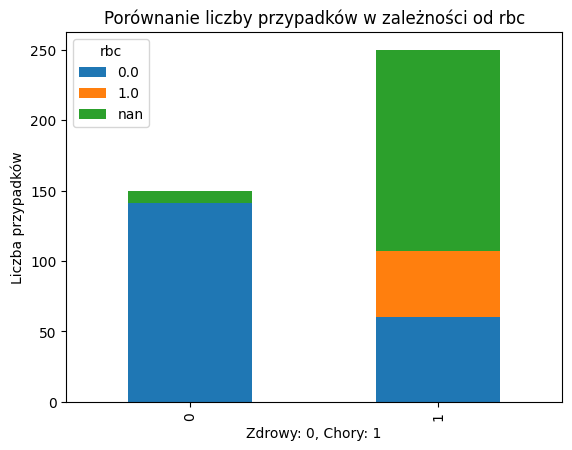

In [19]:
#mozna sie tutaj pokusic o propozycje jakiego uzupelnienia tych wartosci null
ct = pd.crosstab(df['classification'], df['rbc'], dropna=False) 
ct.plot(kind='bar', stacked=True)
plt.title('Porównanie liczby przypadków w zależności od rbc')
plt.xlabel('Zdrowy: 0, Chory: 1')
plt.ylabel('Liczba przypadków')
plt.show()

In [20]:
#Ale nei wiem dlatego robie droppa tej kolumny 
df.drop(columns=['rbc'], inplace=True)

In [21]:
#Poniewaz reszta kolumn ma małą ilość wartości Null usuwam wiersze gdzie znajdja sie te wartosci (z 400 wierszy usunięte zostaje około 70)
df = df.dropna()
df['classification'].value_counts()

classification
1    194
0    135
Name: count, dtype: int64

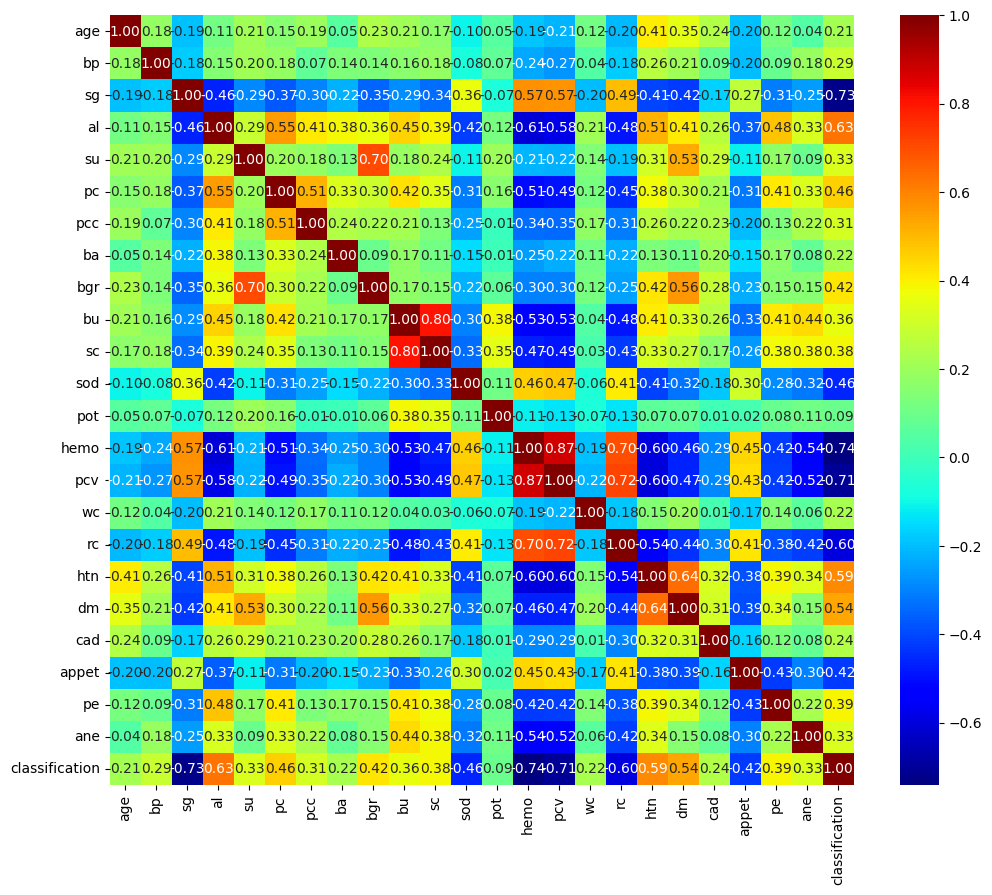

In [22]:
#Korelacje
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="jet",fmt='.2f')
plt.show()

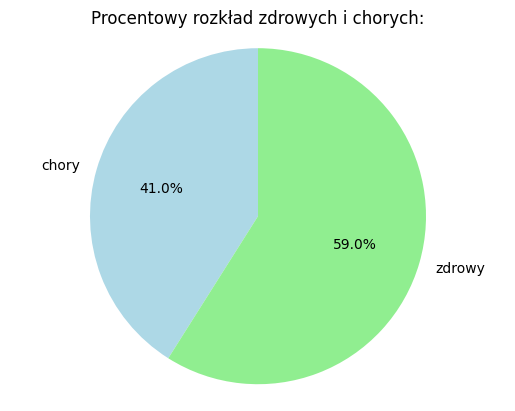

In [23]:
ill = (df['classification'] == 0).sum()
healthy = (df['classification'] == 1).sum()
ill_percentage = (ill / len(df['classification'])) * 100
healthy_percentage = (healthy / len(df['classification'])) * 100
values = [ill, healthy]
plt.pie(values, labels=['chory', 'zdrowy'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy rozkład zdrowych i chorych:')
plt.axis('equal') 
plt.show()

In [30]:
#Poniżej testy czy będzie to działać dla KNN
import random
class DataProc:
    def Shuffle(x):
        for i in range(len(x)):
            j = random.randint(0,len(x)-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    def NormalizeMinMax(x):
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            x_copy[c] = (x_copy[c] - x_copy[c].min()) / (x_copy[c].max() - x_copy[c].min())
        return x_copy

In [25]:
from sklearn.model_selection import train_test_split
DataProc.Shuffle(df)
df_norm = DataProc.NormalizeMinMax(df)
y = df_norm.pop('classification')
X = df_norm 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
import math
def accuracy(y_true,y_pred):
    corr = 0
    for i in range(len(y_pred)):
        if y_true.iloc[i] == y_pred[i]:
            corr +=1
    return corr/(len(y_pred))

In [27]:
class KNN:
    def __init__(self,k):
        self.k = k
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for w in range(len(X_test)):
            distances = []
            for i in range(len(self.X_train)):
                d = 0
                for c in self.X_train.columns:
                    #wzor potem mozna dodac wiecej:
                    d += math.pow(X_test[c].iloc[w] - X_train[c].iloc[i],2)
                distances.append(math.sqrt(d))
            indices=np.argsort(distances)[:self.k]
            #glosowanie przez maxa
            labels=[self.y_train.iloc[i] for i in indices]
            common = max(set(labels),key=labels.count)
            predictions.append(common)
        return predictions    

In [28]:
#z normalizacją
knn = KNN(3)
knn.fit(X_train, y_train)
res = knn.predict(X_test)
accuracy(y_test, res)

0.98989898989899

In [29]:
#bez normalizacji
y = df.pop('classification')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn.fit(X_train, y_train)
res = knn.predict(X_test)
accuracy(y_test, res)

0.7373737373737373